In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
data1 = pd.read_csv("/data/Supplemt 1 Database(Training+Internal).csv")
data2 = pd.read_csv("/data/Supplemt 2 External_Dataset.csv")

In [3]:
data2['database'] = 'external test'

In [4]:
df = pd.concat([data1, data2])

In [5]:
df = df[['database', 'gender', 'age', 'group']]
df['gender'] = df['gender'].replace({1: 'male', 2: 'female'})
print(df)

          database  gender  age    group
0        v41_train  female   12  healthy
1        v41_train  female   12  healthy
2        v41_train  female   12  healthy
3        v41_train  female   13  healthy
4        v41_train    male   14  healthy
..             ...     ...  ...      ...
155  external test  female   19  healthy
156  external test  female   20  healthy
157  external test  female   30  healthy
158  external test  female   48  healthy
159  external test    male   30  healthy

[1816 rows x 4 columns]


In [15]:
df_summarized = df.groupby(['database', 'gender', 'group']).size().reset_index(name='count')
print(df_summarized)

         database  gender      group  count
0   external test  female  depressed     53
1   external test  female    healthy     42
2   external test    male  depressed     27
3   external test    male    healthy     38
4        v41_test  female  depressed    119
5        v41_test  female    healthy     99
6        v41_test    male  depressed     43
7        v41_test    male    healthy     72
8       v41_train  female  depressed    469
9       v41_train  female    healthy    374
10      v41_train    male  depressed    180
11      v41_train    male    healthy    300


In [16]:
df_healthy = df_summarized[df_summarized['group'] == 'healthy']
contingency_table = pd.crosstab(df_healthy['database'], df_healthy['gender'], values=df_healthy['count'], aggfunc='sum')
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_healthy = round(chi2, 3)
p_healthy = round(p, 3)

print(f'Chi2 Statistic: {chi2_healthy}')
print(f'p-value: {p_healthy}')

Chi2 Statistic: 0.678
p-value: 0.713


In [17]:
df_depressed = df_summarized[df_summarized['group'] == 'depressed']
contingency_table = pd.crosstab(df_depressed['database'], df_depressed['gender'], values=df_depressed['count'], aggfunc='sum')
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_depressed = round(chi2, 3)
p_depressed = round(p, 3)

print(f'Chi2 Statistic: {chi2_depressed}')
print(f'p-value: {p_depressed}')

Chi2 Statistic: 1.502
p-value: 0.472


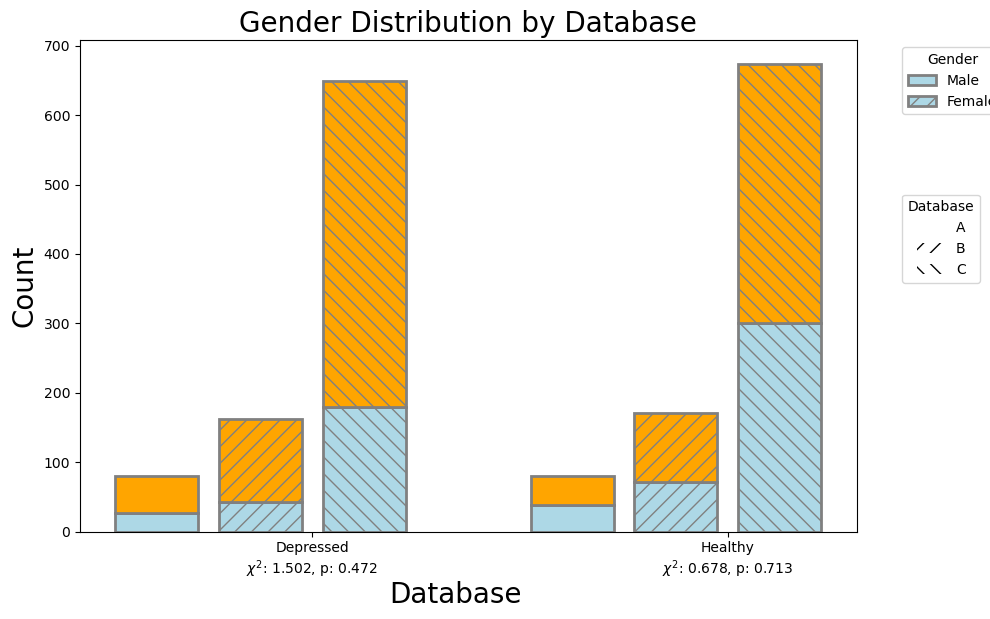

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
groups = df_summarized['group'].unique()
colors = ['lightblue', 'orange']
patterns = ['', '//', '\\\\']  # 斜线填充，无填充，反斜线填充

for idx, group in enumerate(groups):
    data = df_summarized[df_summarized['group'] == group]
    databases = data['database'].unique()
    start_pos = idx * (len(databases) + 1)  # 加1是为了在两组之间留出空白

    for i, database in enumerate(databases):
        sub_data = data[data['database'] == database]
        bottom = 0
        for gender in ['male', 'female']:
            count = sub_data[sub_data['gender'] == gender]['count'].values[0]
            ax.bar(start_pos + i, count, bottom=bottom, label=gender if bottom == 0 else "",
                   color=colors if gender == 'male' else 'orange',
                   hatch=patterns[i], edgecolor='grey', linewidth=2)  # 加粗斜线并设置为黑色
            bottom += count
# x
ax.set_xticks([1.5, 5.5])  # 位置调整为两组数据的中间
labels = [
    f'Depressed\n$\chi^2$: {chi2_depressed:.3f}, p: {p_depressed:.3f}',
    f'Healthy\n$\chi^2$: {chi2_healthy:.3f}, p: {p_healthy:.3f}'
]
ax.set_xticklabels(labels, ha='center')  
# lengend
ax.set_title('Gender Distribution by Database',fontsize=20)
ax.set_ylabel('Count',fontsize=20)
ax.grid(False)

handles, labels = ax.get_legend_handles_labels()
gender_legend = ax.legend(handles[:2], ['Male', 'Female'], title='Gender', loc='upper left', bbox_to_anchor=(1.05, 1))
ax.add_artist(gender_legend) 
database_legend_patches = [Patch(facecolor='white', hatch=pattern, label=category) for pattern, category in zip(patterns, categories)]
database_legend = ax.legend(handles=database_legend_patches, title='Database', loc='upper left', bbox_to_anchor=(1.05, 0.7))

fig.text(0.46, 0,'Database', ha='center', va='center', fontsize=20)

plt.tight_layout()
plt.show()

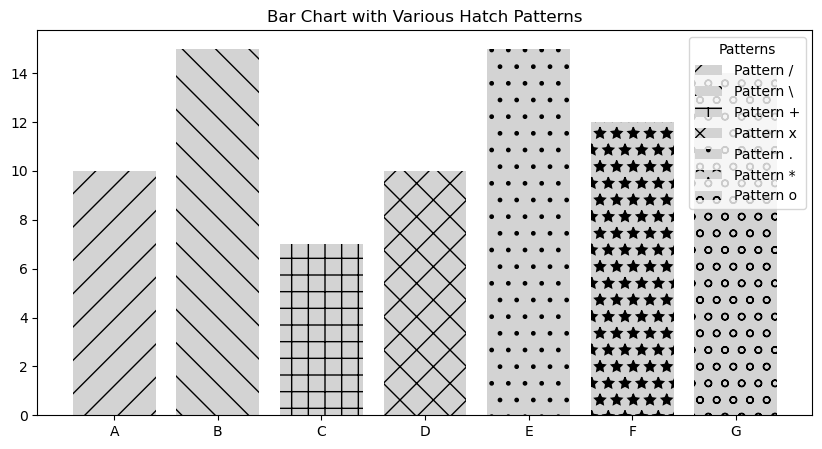